# Logistic Regression:
is a `classfication` algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the `logistic sigmoid function` to return a `probability values` which can then be mapped to two or more discrete classes.

`Logistic Regression` can be used for:
1. Binary classification
2. Multi_class classification
3. One-vs-rest classification

# Assumptions of Logistic Regression:
1. The dependent variable must be categorical in nature.
2. The independent variables(features) must be independent.
3. There should be no outliers in the data. Check for outliers.
4. There should be no high correlations among the independent variables. This can be checked using a correlation matrix.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [14]:
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# preprocessing the data
# remove the deck column
df.drop('deck', inplace=True, axis=1)
# impute missing values in age and fare
df['age']= df['age'].fillna(df['age'].median())
df['fare']= df['fare'].fillna(df['fare'].median())
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

# encode the categorical variable using for loop
le= LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [16]:
# X and y columns
X= df.drop('survived', axis=1)
y=df['survived']

In [17]:
# train test spilt the data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [18]:
# call the model
model= LogisticRegression()

In [19]:
model.fit(X_train, y_train)

c:\Users\Summaiya\.conda\envs\ydata_profiling\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
# predict the values
y_pred= model.predict(X_test)

In [22]:
# evaluate the model
print('Accuracy_score', accuracy_score(y_test, y_pred))
print('Recall_score', recall_score(y_test, y_pred))
print('Precision_score', precision_score(y_test, y_pred))
print('F1_score', f1_score(y_test, y_pred))
print('confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('classification_report: \n', classification_report(y_test, y_pred))

Accuracy_score 1.0
Recall_score 1.0
Precision_score 1.0
F1_score 1.0
confusion matrix: 
 [[115   0]
 [  0  64]]
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(33.22222222222222, 0.5, 'Actual')

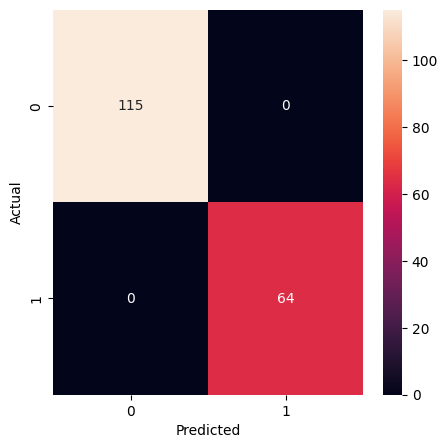

In [24]:
# plot the confusion matric
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [27]:
# save the model
import pickle
pickle.dump(model, open('./save/Logistic_regression.pkl', 'wb'))